# Exploratory Analysis about Data and Feature Engineering

## Introduction

Created in 1953, the U.S. Small Business Administration (SBA) continues to help small business owners and entrepreneurs pursue the American dream. The SBA is the only cabinet-level federal agency fully dedicated to small business and provides counseling, capital, and contracting expertise as the nation’s only go-to resource and voice for small businesses. 

The loans based on the situation in the current era, where the need for loans increases is influenced by various factors. The increasing need for loans has led to the emergence of various types of organizations / business units to lend funds such as P2P, banks, etc. The problem that will arise is whether the loans that have been disbursed will be paid in full or not.

This Notebook is about exploring the data set to look for the feature related to the loan payment.

## Environment Setup

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Setup

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. 


For this analysis, I am only using training set of data that I split in the main notebook.

In [2]:
SBA = pd.read_csv("SBA/train.csv", low_memory=False)
SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,8699544003,DELAWARE LLC,SALT LAKE CITY,UT,84115,MOUNTAIN AMERICA FCU,UT,451110,14-Mar-05,2005,...,T,N,13-Mar-14,31-Mar-05,"$78,443.00",$0.00,CHGOFF,"$12,684.00","$25,000.00","$12,500.00"
1,3712934005,ELECTRIC CAR DISTRIBUTORS A CA,RANCHO MIRAGE,CA,92270,CDC SMALL BUS. FINAN CORP,CA,452110,26-Apr-00,2000,...,0,N,NaN,13-Jun-01,"$478,000.00",$0.00,P I F,$0.00,"$478,000.00","$478,000.00"
2,2737686007,RODRIGUEZ VALARDE LLC,ANKENY,IA,50021,LUANA SAVINGS BANK,IA,722110,30-Mar-07,2007,...,0,N,NaN,31-Aug-07,"$89,329.00",$0.00,P I F,$0.00,"$89,329.00","$75,930.00"
3,1394215002,"Hicklin Enterprises, L.L.C.",Joplin,MO,64804,HOMETOWN BANK NATL ASSOC,MO,311330,29-Jul-05,2005,...,N,N,NaN,31-Aug-05,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$75,000.00"
4,4004705006,"KARMAN RUBBER COMPANY, INC.",AKRON,OH,44320,CFBANK,OH,326291,1-Apr-10,2010,...,N,N,NaN,1-Apr-10,"$390,000.00",$0.00,P I F,$0.00,"$390,000.00","$351,000.00"


In [3]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674373 entries, 0 to 674372
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      674373 non-null  int64  
 1   Name               674361 non-null  object 
 2   City               674347 non-null  object 
 3   State              674361 non-null  object 
 4   Zip                674373 non-null  int64  
 5   Bank               673212 non-null  object 
 6   BankState          673206 non-null  object 
 7   NAICS              674373 non-null  int64  
 8   ApprovalDate       674373 non-null  object 
 9   ApprovalFY         674373 non-null  object 
 10  Term               674373 non-null  int64  
 11  NoEmp              674373 non-null  int64  
 12  NewExist           674271 non-null  float64
 13  CreateJob          674373 non-null  int64  
 14  RetainedJob        674373 non-null  int64  
 15  FranchiseCode      674373 non-null  int64  
 16  Ur

There are 899164 instances of data and 27 features in the SBA National loan dataset.

SBA Dataset Columns Explanation
* LoanNr_ChkDgt : Identifier Primary key
* Name : Borrower name
* City : Borrower city
* State : Borrower state
* Zip : Borrower zip code
* Bank : Bank name
* BankState : Bank state
* NAICS : North American industry classification system code
* ApprovalDate : Date SBA commitment issued
* ApprovalFY : Fiscal year of commitment
* Term : Loan term in months
* NoEmp : Number of business employees
* NewExist : 1 = Existing business, 2 = New business
* CreateJob : Number of jobs created
* RetainedJob : Number of jobs retained
* FranchiseCode : Franchise code, (00000 or 00001) = No franchise
* UrbanRural : 1 = Urban, 2 = rural, 0 = undefined
* RevLineCr : Revolving line of credit: Y = Yes, N = No
* LowDoc : LowDoc Loan Program: Y = Yes, N = No
* ChgOffDate : The date when a loan is declared to be in default
* DisbursementDate : Disbursement date
* DisbursementGross : Amount disbursed
* BalanceGross : Gross amount outstanding
* MIS_Status : Loan status charged off = CHGOFF, Paid in full =PIF
* ChgOffPrinGr : Charged-off amount
* GrAppv : Gross amount of loan approved by bank
* SBA_Appv : SBA’s guaranteed amount of approved loan

## Exploration and Analysis

### Using
The features that I think useful for prediction are listed below.
1. NewExist
2. Term
3. LowDoc
4. NoEmp
5. DisbursementGross
6. GrAppv
7. SBA_Appv
8. DisbursementDate 
9. FranchiseCode 
10. ApprovalFY 
11. NAICS 
12. State

#### New Exists
Explains the business conditions, is it a new or existing business. New and existing businesses have different risks in the business condition. This can be used as feature for modeling. From table information we know that NewExist (1 = Existing Business, 2 = New Business). This represents whether the business is an existing business (in existence for more than 2 years) or a new business (in existence for less than or equal to 2 years).

In [4]:
print(SBA["NewExist"].value_counts())
print(SBA["NewExist"].unique())

1.0    483756
2.0    189749
0.0       766
Name: NewExist, dtype: int64
[ 2.  1.  0. nan]


The value 2.0 and 1.0 are only relevant. As the count of 0.0"s  and NaN is small, they can be dropped.

We will create a new feature that explains whether a business is new or not a binary variable, 
* New = 1 if NewExist == 2.0 (New) 
* New = 0 if NewExists == 1.0 (Existing Business)

In [5]:
sba_new = SBA[(SBA["NewExist"] == 1.0) | (SBA["NewExist"] == 2.0)]

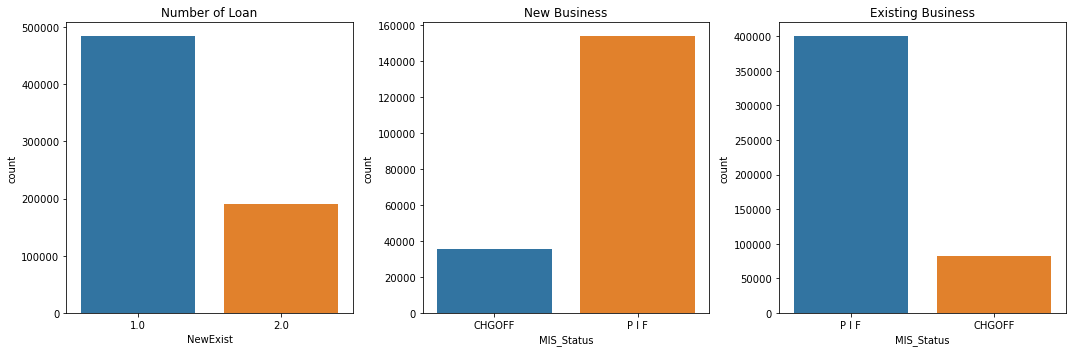

In [6]:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = sba_new["NewExist"])
plt.title("Number of Loan")

plt.subplot(1,3,2)
sns.countplot(x = sba_new[sba_new["NewExist"] == 2.0]["MIS_Status"])
plt.title("New Business")

plt.subplot(1,3,3)
sns.countplot(x = sba_new[sba_new["NewExist"] == 1.0]["MIS_Status"])
plt.title("Existing Business")


plt.tight_layout()

In [7]:
tf_pipe = ColumnTransformer(
    transformers=[
    ("new", OneHotEncoder(sparse=False, drop="first"), ["NewExist"]),
    ]
)
tf_pipe.fit_transform(sba_new).shape

(673505, 1)

#### Term 
Whether a loan is backed by real estate (possession of land) is another risk indicator that is discussed. The rationale for this indicator is that the value of the land is often large enough to cover the amount of any principal outstanding, thereby increasing the probability of Paid in full.

The term provides information on how long the loan will take. Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. 

In [8]:
len(SBA[SBA["Term"].isnull()])

0

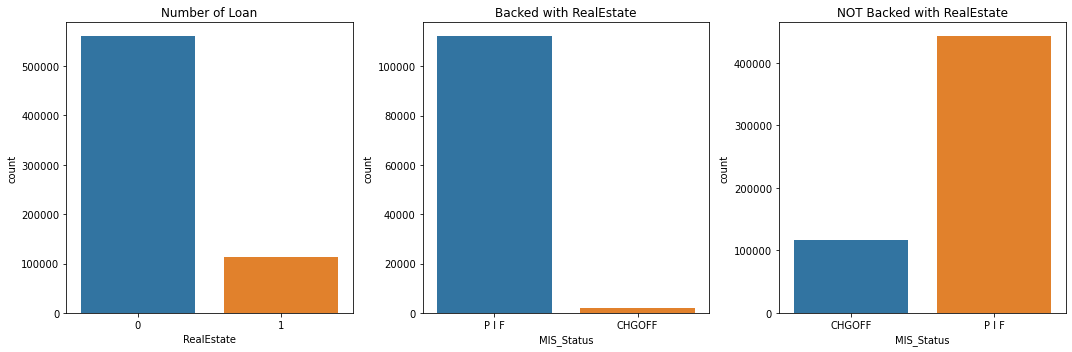

In [9]:
df_real = SBA.copy()

def real_estate(x) :
    if x["Term"] >= 240:
        return 1
    else:
        return 0
    
df_real["RealEstate"] = df_real.apply(real_estate,axis=1)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = df_real["RealEstate"])
plt.title("Number of Loan")

plt.subplot(1,3,2)
sns.countplot(x = df_real[df_real["RealEstate"] == 1]["MIS_Status"])
plt.title("Backed with RealEstate")

plt.subplot(1,3,3)
sns.countplot(x = df_real[df_real["RealEstate"] == 0]["MIS_Status"])
plt.title("NOT Backed with RealEstate")


plt.tight_layout()

We will create a new feature that explains whether a Loan is backed by a real estate or not, a binary variable, 

* RealEstate = 1 if Term >= 240 
* RealEstate = 0 if Term < 240 

In [10]:
def backed_by_real_estate(mat):
    rows, cols = mat.shape
    assert cols == 1
    def encode(x):
        return 0 if x < 240 else 1

    if hasattr(mat, "iloc"):
        return mat.iloc[:, 0].apply(encode).to_frame()
    else:
        return mat[:, 0].apply(encode).reshape((rows, 1))

tf_pipe = ColumnTransformer(
    transformers=[
    ("real_estate", FunctionTransformer(backed_by_real_estate), ["Term"]),
    ]
)

tf_pipe.fit_transform(SBA).shape

(674373, 1)

#### LowDoc
LowDoc Loan Program means the borrower can borrow with little administration. The loan transaction type will affects the level of risk and financial psychology. If any business are considered for a loan with little administration, this might indicate toward the payment of loan.
The value for LowDoc is either Y or N.

In [11]:
print(SBA["LowDoc"].value_counts())
print(SBA["LowDoc"].unique())

N    587468
Y     82421
0      1108
C       559
S       444
A       364
R        61
1         1
Name: LowDoc, dtype: int64
['N' 'Y' nan 'S' '0' 'A' 'C' 'R' '1']


Ater checking LowDoc there are some value that not defined as "N" or "Y". That codes are C,S,A,R,and0 which are not defined and dont know what that code means. Because of the number of that values are not too much (could see on the cell below). So, I decided to drop it too.

In [12]:
sba_lowdoc = SBA[(SBA["LowDoc"] == "Y") | (SBA["LowDoc"] == "N")]

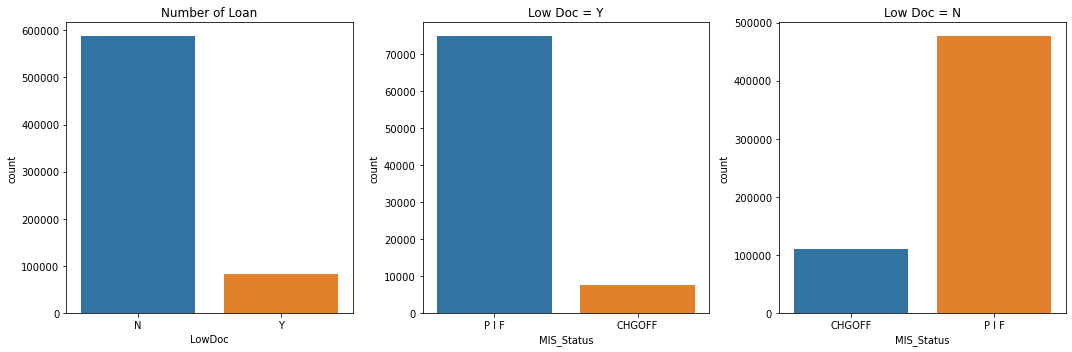

In [13]:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = sba_lowdoc["LowDoc"])
plt.title("Number of Loan")

plt.subplot(1,3,2)
sns.countplot(x = sba_lowdoc[sba_lowdoc["LowDoc"] == "Y"]["MIS_Status"])
plt.title("Low Doc = Y")

plt.subplot(1,3,3)
sns.countplot(x = sba_lowdoc[sba_lowdoc["LowDoc"] == "N"]["MIS_Status"])
plt.title("Low Doc = N")


plt.tight_layout()

In [14]:
tf_pipe = ColumnTransformer(
    transformers=[
    ("lowdoc", OneHotEncoder(sparse=False, drop="first"), ["LowDoc"]),
    ]
)
tf_pipe.fit_transform(sba_lowdoc).shape

(669889, 1)

#### No of employee
The logic is that the smaller the number of employees the smaller the size of the company, and vice versa. The greater the size of the company, then it can be defined that the business is more stable and less likely to default. So, it can be agreed that NoEmp is also an important feature in determining loan status


According to the SBA, a small businesses have a maximum of anywhere between 250 and 1500 employees— all depending on the specific industry the business is in. Additionally, businesses have revenue limits that they must not exceed if they want to qualify for SBA financing. In general, companies with more than 1500 employees are not eligible for SBA loans." References : https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

In [15]:
SBA[SBA["NoEmp"] > 1500].shape

(134, 27)

We can see that some company have the number of employee exceeding 1500. As it is a small number, I decided to drop it.

In [16]:
sba_no_emp =  SBA[SBA["NoEmp"] <= 1500]

In [17]:
tf_pipe = ColumnTransformer(
    transformers=[
    ("lowdoc", StandardScaler(), ["NoEmp"]),
    ]
)
tf_pipe.fit_transform(sba_lowdoc).shape

(669889, 1)

#### Gross Disbursement
Gross Disbursement can be one of the factor that can be considered as indicator. It indicates the size of loan that might explain the size of the underlying business. Larger the loan, higher the possibility of business being established and expanding, thereby increasing the likelihood of paying of the loan.

In [18]:
len(SBA[SBA["DisbursementGross"].isnull()])

0

In [19]:
def clean_currency(mat):
    rows, cols = mat.shape
    assert cols == 1  # if we don"t have 2 columns, things are unexpected

    currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
    if hasattr(mat, "iloc"):
        return mat.iloc[:, 0].apply(currency_cleaning).astype(int).to_frame()
    else:
        return  mat[:, 1].apply(currency_cleaning).astype(int).reshape((rows, 1))

disbrustment_gross_pipeline = Pipeline(
    steps=[
        ("clean_data", FunctionTransformer(clean_currency)), 
        ("scaler", StandardScaler())
        ]
)

tf_pipe = ColumnTransformer(
    transformers=[
    ("grossdisbrusement", disbrustment_gross_pipeline, ["DisbursementGross"]),
    ]
)
tf_pipe.fit_transform(SBA).shape


(674373, 1)

#### GrAppv and SBA_Appv

The SBA approved amount can be one of the factor to build a model. Along with gross amount of loan approved by the bank, a ratio of SBA guaranteed to Bank approved can be calculated. 

In [20]:
print(len(SBA[SBA["GrAppv"].isnull()]))
print(len(SBA[SBA["SBA_Appv"].isnull()]))

0
0


In [21]:
def SBA_approved_portion(mat):
    currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
    rows, cols = mat.shape
    assert cols == 2  # if we don"t have 2 columns, things are unexpected
    
    if hasattr(mat, "iloc"):
        mat.iloc[:, 0] = mat.iloc[:, 0].apply(currency_cleaning).astype(int)
        mat.iloc[:, 1] = mat.iloc[:, 1].apply(currency_cleaning).astype(int)
        res = mat.iloc[:, 0] / mat.iloc[:, 1]
        return res.to_frame()
    else:
        mat[:, 0] = mat[:, 0].apply(currency_cleaning).astype(int)
        mat[:, 1] = mat[:, 1].apply(currency_cleaning).astype(int)
        res = mat[:, 0] / mat[:, 1]
        return res.reshape((rows, 1))

tf_pipe = ColumnTransformer(
    transformers=[
    ("sba_portion", FunctionTransformer(SBA_approved_portion), ["SBA_Appv", "GrAppv"]),
    ]
)
tf_pipe.fit_transform(SBA).shape

(674373, 1)

#### Disbursement Date

One of the risk factor to keep in mind while approving loan might be the economy. Small business loans are affected by the economy in general, and more small business loans tend to default right before and during an economic recession. Thus Disbursement Date along with Loan term can be used to see whether loan were active during great recession.

In [22]:
len(SBA[SBA["DisbursementDate"].isnull()])

1719

A Few null value that will be dropped

In [23]:
sba_recession = SBA[SBA["DisbursementDate"].notnull()]

In [24]:
def loan_active_during_recession(mat):
    rows, cols = mat.shape
    assert cols == 2  # if we don"t have 2 columns, things are unexpected
    
    if hasattr(mat, "iloc"):
        rec_date = pd.to_datetime(mat.iloc[:, 0]) + pd.to_timedelta(mat.iloc[:, 1]*30, unit="D")
        recession = pd.Series(0, index=mat.index)
        recession[(rec_date >= pd.to_datetime("2007-12-01")) & (rec_date <= pd.to_datetime("2009-06-30"))] = 1 
        return recession.to_frame()
    else:
        rec_date = pd.to_datetime(mat[:, 0]) + pd.to_timedelta(mat[:, 1]*30, unit="D")
        recession = pd.Series(0, index=mat.index)
        recession[(rec_date >= pd.to_datetime("2007-12-01")) & (rec_date <= pd.to_datetime("2009-06-30"))] = 1 
tf_pipe = ColumnTransformer(
    transformers=[
    ("recession", FunctionTransformer(loan_active_during_recession), ["DisbursementDate", "Term"])
    ]
)

tf_pipe.fit_transform(sba_recession).shape

(672654, 1)

#### Franchise Code
Whether a business has franchise or not might impact the loan payment. Having franchise means a bigger business.
Franchise Code 00000 or 00001 = No Franchise

We will convert this column into whether the business is a franchise or not.

In [25]:
len(SBA[SBA["FranchiseCode"].isnull()])

0

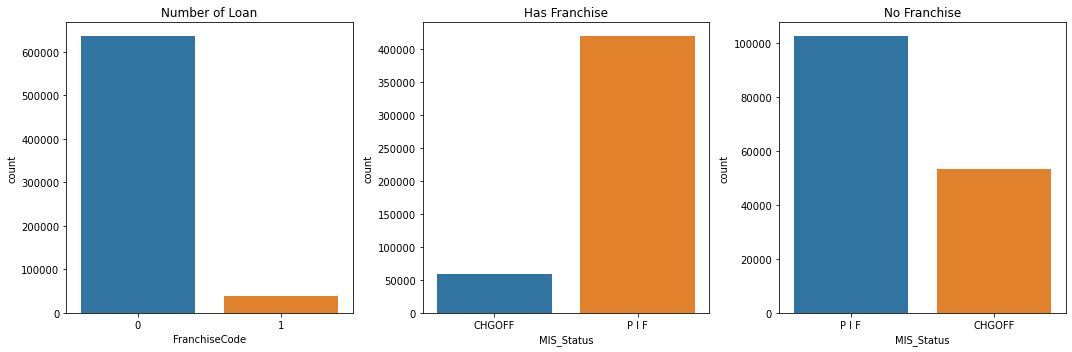

In [26]:
df_franchise = SBA.copy()

def franchise_code(x) :
    return 0  if x["FranchiseCode"] == 1 or x["FranchiseCode"] == 0 else 1

    
df_franchise["FranchiseCode"] = df_franchise.apply(franchise_code,axis=1)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x = df_franchise["FranchiseCode"])
plt.title("Number of Loan")

plt.subplot(1,3,2)
sns.countplot(x = df_real[df_real["FranchiseCode"] == 1]["MIS_Status"])
plt.title("Has Franchise")

plt.subplot(1,3,3)
sns.countplot(x = df_real[df_real["FranchiseCode"] == 0]["MIS_Status"])
plt.title("No Franchise")


plt.tight_layout()

In [27]:
def franchise_classifier(mat):
    rows, cols = mat.shape
    assert cols == 1  # if we don"t have 2 columns, things are unexpected
    def classify(x):
        return 0  if x == 1 or x == 0 else 1

    if hasattr(mat, "iloc"):
        return mat.iloc[:, 0].apply(classify).to_frame()
    else:
        return  mat[:, 0].apply(classify).reshape((rows, 1))

tf_pipe = ColumnTransformer(
    transformers=[
    ("franchise", FunctionTransformer(franchise_classifier), ["FranchiseCode"])
    ]
)

tf_pipe.fit_transform(SBA).shape

(674373, 1)

#### Approval Year
One of the risk factor to keep in mind while approving loan might be the economy. Small business loans are affected by the economy in general, and more small business loans tend to default right before and during an economic recession. Thus Approval along with Loan term can be used to see whether loan were approved during great recession.

In [28]:
SBA["ApprovalFY"].unique()

array(['2005', '2000', '2007', '2010', '2006', '1994', '1996', '1998',
       '2003', '2001', '2008', '1999', '2004', '1995', '2011', '1997',
       '2002', '1992', '1987', '2012', '2009', '1986', '1990', '1989',
       '1983', '1993', '1981', '1991', '1980', '1985', '2013', '1984',
       '1973', '1988', '1977', '1982', '1979', '2014', '1971', '1972',
       '1974', '1976', '1978', '1975', '1970', '1976A', '1969', '1967',
       '1968', '1966', '1965'], dtype=object)

In [29]:
SBA["ApprovalFY"] = SBA["ApprovalFY"].apply(lambda x: 1976 if x == "1976A" else int(x)).astype(int)

<AxesSubplot:xlabel='count', ylabel='ApprovalFY'>

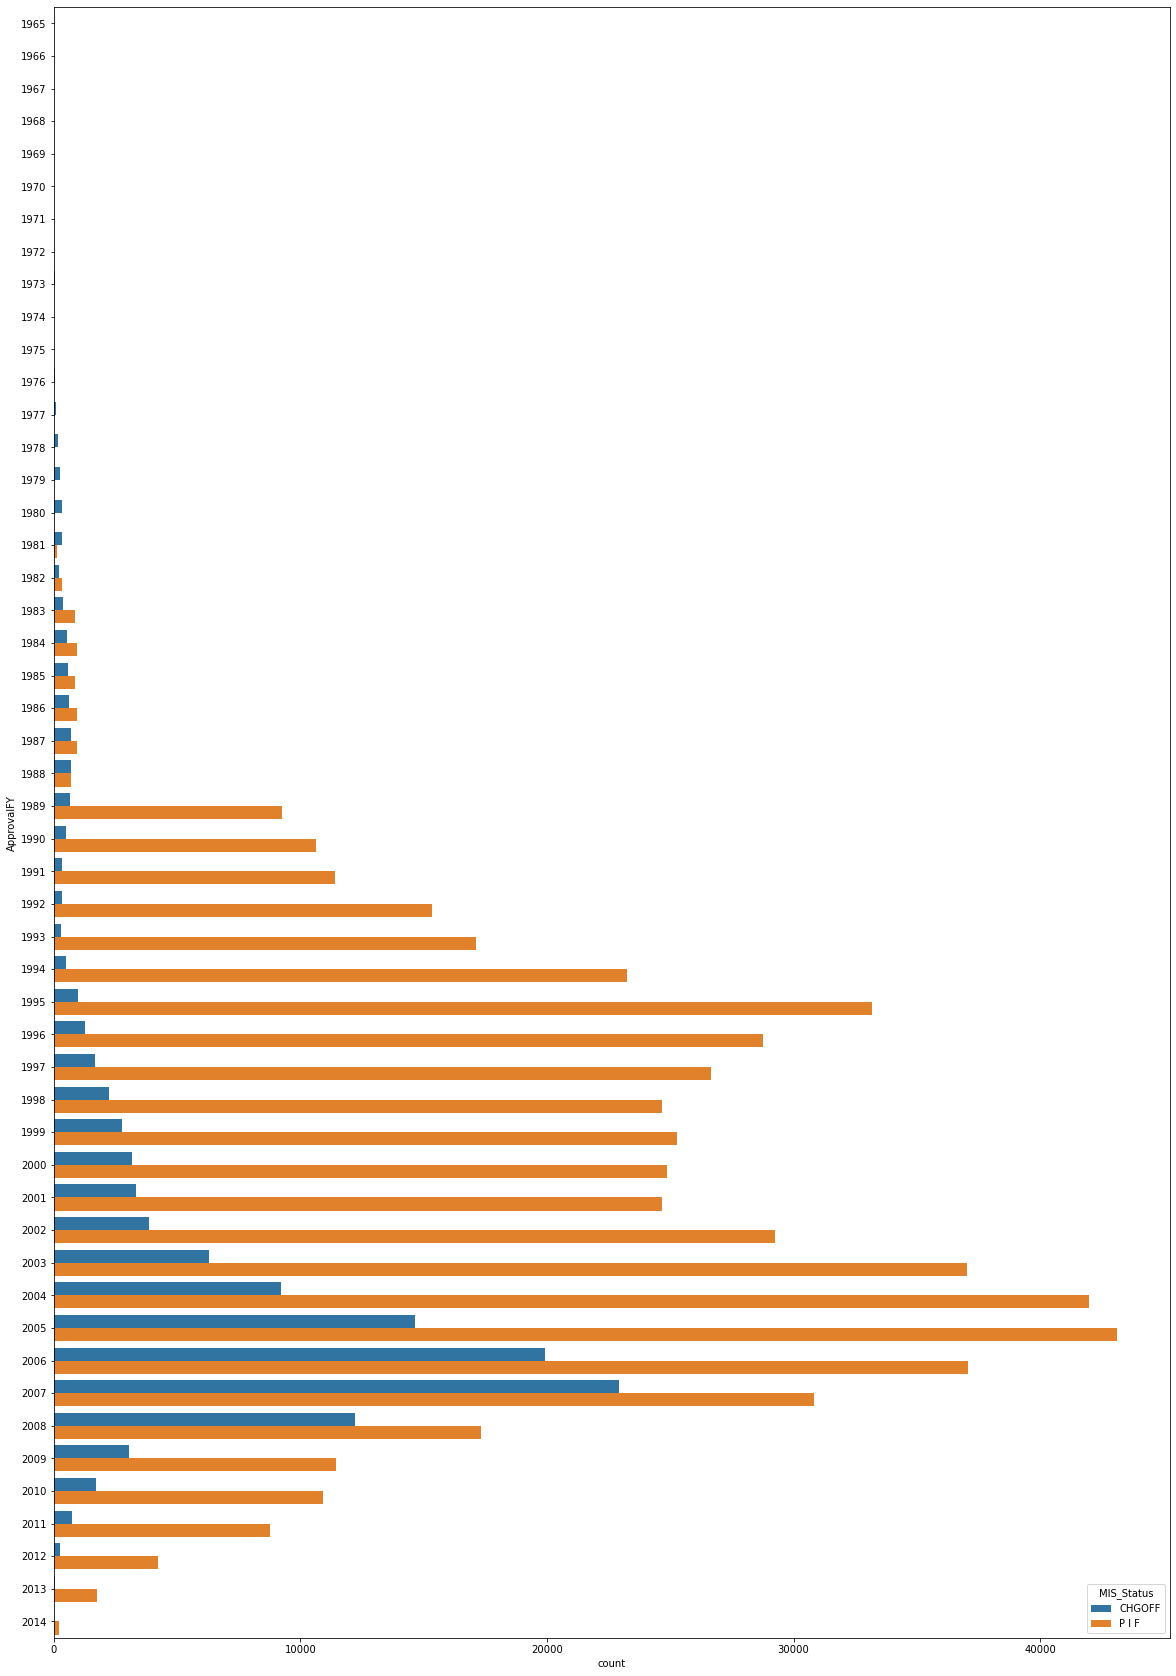

In [30]:
plt.figure(figsize=(20,30))
sns.countplot(data=SBA,y="ApprovalFY",hue="MIS_Status")


The Great Recession refers to the economic downturn from 2007 to 2009 after the bursting of the U.S. housing bubble and the global financial crisis. So make sense why in 2007 and 2008 the number of CGHOFF was high. This is caused by The Great Recession.

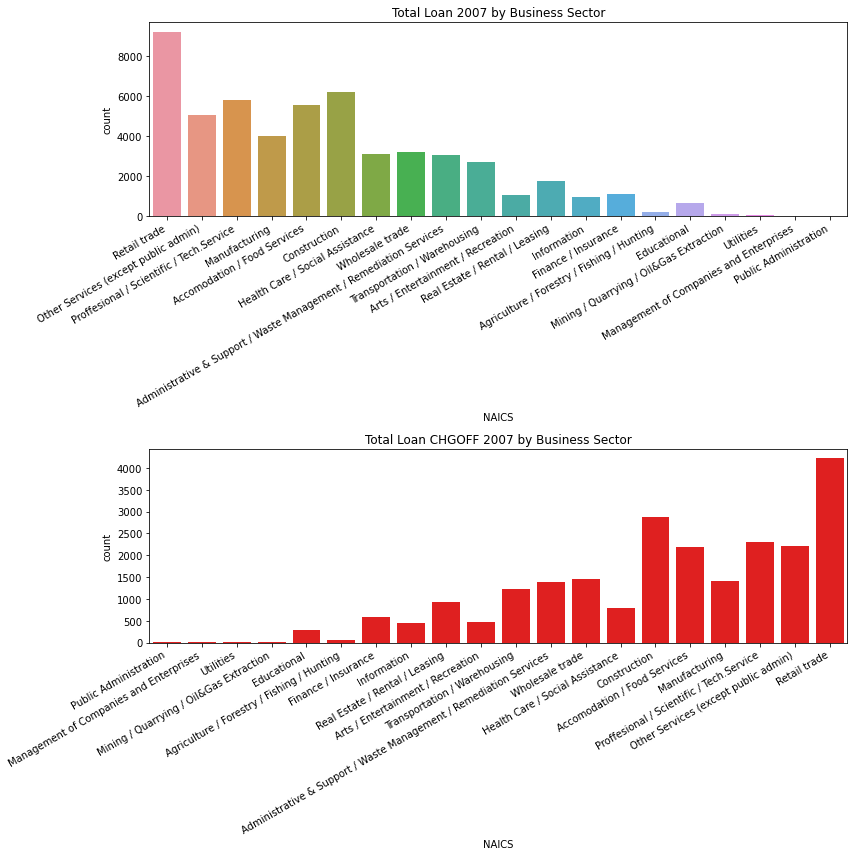

In [31]:
df = SBA.copy()
temp = []
for item in df["NAICS"]:
    if item == 0 :
        temp.append("00")
    else :
        a = list(str(item))[:2]
        b = "".join(a)
        temp.append(str(item)[:2])

df["NAICS"] = temp
df["NAICS"] = df["NAICS"].map({
    "11": "Agriculture / Forestry / Fishing / Hunting",
    "21": "Mining / Quarrying / Oil&Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "Wholesale trade",
    "44": "Retail trade",
    "45": "Retail trade",
    "48": "Transportation / Warehousing",
    "49": "Transportation / Warehousing",
    "51": "Information",
    "52": "Finance / Insurance",
    "53": "Real Estate / Rental / Leasing",
    "54": "Proffesional / Scientific / Tech.Service",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative & Support / Waste Management / Remediation Services",
    "61": "Educational",
    "62": "Health Care / Social Assistance",
    "71": "Arts / Entertainment / Recreation",
    "72": "Accomodation / Food Services",
    "81": "Other Services (except public admin)",
    "92": "Public Administration"
})
plt.figure(figsize=(12,12))


plt.subplot(2,1,1)
sns.countplot(data=df[df["ApprovalFY"] == 2007],x="NAICS",order=df["NAICS"].value_counts().index)
plt.title("Total Loan 2007 by Business Sector")
plt.xticks(rotation=30, ha="right")

plt.subplot(2,1,2)
sns.countplot(data=df[(df["ApprovalFY"] == 2007) & (df["MIS_Status"] == "CHGOFF")],x="NAICS",color="r",order=df["NAICS"].value_counts(ascending=True).index)
plt.title("Total Loan CHGOFF 2007 by Business Sector")
plt.xticks(rotation=30, ha="right")

plt.tight_layout()

Loan vs MIS_Status by idustrial sector at the beginning of the Great Recession, shows that retail trade and construction got the biggest impact. And, from this visualization we can say too that business sector (NAICS) is one of the important feature from this dataset

#### NAICS

NAICS is a classification system of several types of industries registered in America. The first two digits of NAICS explained the type of business industries. NAICS itself has the potential for decision making. The type of industry will affect the company"s performance in business. So that this feature will be used later in the model.

In [32]:
SBA["NAICS"].value_counts()

0         151497
722110     21028
722211     14619
811111     10931
621210     10446
           ...  
336320         1
312210         1
327410         1
315280         1
327110         1
Name: NAICS, Length: 1307, dtype: int64

In [33]:
def naics_classifier(mat):
    rows, cols = mat.shape
    assert cols == 1
    def encode(x):
        mapping = {
            "0": "0",
            "31": "31-33",
            "32": "31-33",
            "33": "31-33",
            "44": "44-45",
            "48": "48-49",
            "49": "48-49",
        }
        x = str(x)
        x = "0" if x[0] == "0" else x[:2]
        return mapping.get(x, x)

    if hasattr(mat, "iloc"):
        return mat.iloc[:, 0].apply(encode).to_frame()
    else:
        return mat[:, 0].apply(encode).reshape((rows, 1))
    
naics_pipeline = Pipeline(
    steps=[
        ("naics_class", FunctionTransformer(naics_classifier)), 
        ("encoding", OneHotEncoder(sparse=False, drop="first"))
        ]
)

tf_pipe = ColumnTransformer(
    transformers=[
    ("naics", naics_pipeline, ["NAICS"])
    ]
)

tf_pipe.fit_transform(SBA).shape

(674373, 21)

#### Location
Location by State is one possible predictor that students identify in their discussions. They recognize that the 50 states and Washington DC have different economic environments in which they operate, resulting in different default rates. 

In [34]:
SBA["State"].unique()

array(['UT', 'CA', 'IA', 'MO', 'OH', 'NY', 'FL', 'TX', 'LA', 'MA', 'MD',
       'TN', 'WI', 'PA', 'MI', 'IN', 'AZ', 'CT', 'OR', 'NJ', 'ID', 'MS',
       'IL', 'NH', 'KY', 'MT', 'NV', 'MN', 'DE', 'VA', 'SC', 'GA', 'VT',
       'NM', 'ND', 'KS', 'RI', 'OK', 'ME', 'WY', 'NE', 'NC', 'AR', 'AL',
       'WA', 'CO', 'WV', 'AK', 'HI', 'DC', 'SD', nan], dtype=object)

In [35]:
SBA[SBA["State"].isnull()].shape

(12, 27)

There are 14 NaN values in State columns that needs to be dropped while using.

#### Data Cleaning

In [36]:
sba_subset = SBA[["NewExist", "Term", "LowDoc", "NoEmp", "DisbursementGross", "SBA_Appv", "GrAppv", "DisbursementDate", "FranchiseCode", "ApprovalFY", "NAICS", "State", "MIS_Status"]].copy()

sba_subset = sba_subset[sba_subset["MIS_Status"].notnull()]
sba_subset = sba_subset[(sba_subset["NewExist"] == 1.0) | (sba_subset["NewExist"] == 2.0)]
sba_subset = sba_subset[sba_subset["Term"].notnull()]
sba_subset = sba_subset[(sba_subset["LowDoc"] == "Y") | (sba_subset["LowDoc"] == "N")]
sba_subset =  sba_subset[sba_subset["NoEmp"] <= 1500]
sba_subset =  sba_subset[sba_subset["DisbursementGross"].notnull()]
sba_subset =  sba_subset[sba_subset["SBA_Appv"].notnull()]
sba_subset =  sba_subset[sba_subset["GrAppv"].notnull()]
sba_subset =  sba_subset[sba_subset["DisbursementDate"].notnull()]
sba_subset =  sba_subset[sba_subset["FranchiseCode"].notnull()]
sba_subset =  sba_subset[sba_subset["ApprovalFY"].notnull()]
sba_subset =  sba_subset[sba_subset["NAICS"].notnull()]
sba_subset =  sba_subset[sba_subset["State"].notnull()]


In [37]:
currency_cleaning = lambda x: int(float(x[1:].replace(",", "")))
sba_subset["DisbursementGross"] = sba_subset["DisbursementGross"].apply(currency_cleaning).astype(int)
sba_subset["SBA_Appv"] = sba_subset["SBA_Appv"].apply(currency_cleaning).astype(int)
sba_subset["GrAppv"] = sba_subset["GrAppv"].apply(currency_cleaning).astype(int)
sba_subset["SBA_portion"] = sba_subset["SBA_Appv"] / sba_subset["DisbursementGross"]
sba_subset["NewExist"] = sba_subset["NewExist"].apply(lambda x: 1 if x == 2.0 else 0)
sba_subset["Term"] = sba_subset["Term"].apply(lambda x: 0 if x < 240  else 1)
sba_subset["LowDoc"] = sba_subset["LowDoc"].apply(lambda x: 1 if x == "Y" else 0)
rec_date = pd.to_datetime(sba_subset["DisbursementDate"]) + pd.to_timedelta(sba_subset["Term"]*30, unit="D")
recession = pd.Series(0, index=sba_subset.index)
recession[(rec_date >= pd.to_datetime("2007-12-01")) & (rec_date <= pd.to_datetime("2009-06-30"))] = 1
sba_subset["Recession"] = recession
sba_subset["FranchiseCode"] = sba_subset["FranchiseCode"].apply(lambda x: 0  if x == 1 or x == 0 else 1)
sba_subset["ApprovalFY"] = sba_subset["ApprovalFY"].apply(lambda x: 1976 if x == "1976A" else int(x)).astype(int)
sba_subset.drop(["DisbursementDate", "SBA_Appv", "GrAppv"], axis=1, inplace=True)

def NAICS_Coding(x):
    mapping = {
        "0": "0",
        "31": "31-33",
        "32": "31-33",
        "33": "31-33",
        "44": "44-45",
        "48": "48-49",
        "49": "48-49",
    }
    x = str(x)
    x = "0" if x[0] == "0" else x[:2]
    return mapping.get(x, x)
sba_subset["NAICS"] = sba_subset["NAICS"].apply(NAICS_Coding)



#### Relation between variables

<AxesSubplot:xlabel='ApprovalFY', ylabel='DisbursementGross'>

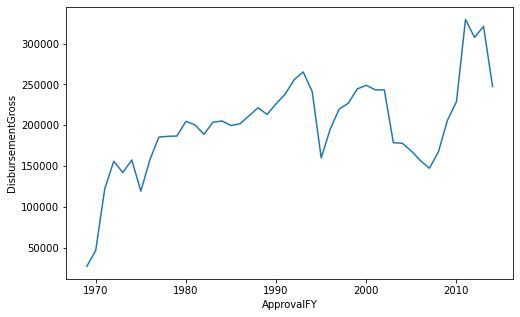

In [38]:
plt.figure(figsize=(8,5))
sns.lineplot(x=sba_subset.groupby("ApprovalFY").mean().reset_index()["ApprovalFY"],y=sba_subset.groupby("ApprovalFY").mean().reset_index()["DisbursementGross"])

The average of the DisbursementGross per year is fluctuative, there is a decreasing of the loan since 2002 until 2006, but after the great recession (2010) the loan increase sharply.

Text(0.5, 1.0, 'Correlation Between Features')

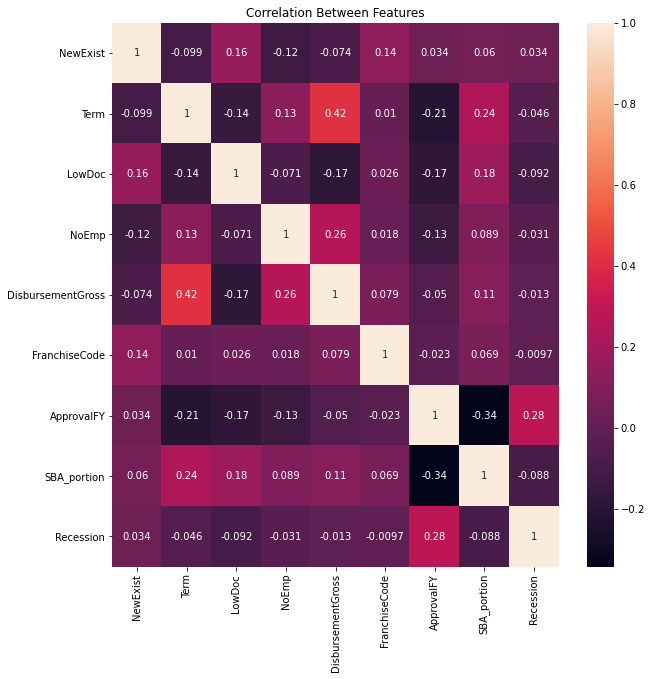

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(sba_subset.corr(),annot=True)
plt.title("Correlation Between Features")

### Not Using

Some of the columns might not be usable or will be too specific for prediction. So, dropping them should not have a huge impact.
* LoanNr_ChkDgt : Identifier Primary key
* Name : Borrower name
* City : Borrower city
* Zip : Borrower zip code
* Bank : Bank name
* BankState : Bank state


#### Urban or Rural
UrbanRural field denotes whether the business is in urban or rural area. This might be one of the factor for prediction the loan status. (1= Urban, 2= Rural, 0 = Undefined)

In [40]:
print(SBA["UrbanRural"].value_counts())
print(SBA["UrbanRural"].unique())

1    353230
0    242187
2     78956
Name: UrbanRural, dtype: int64
[1 0 2]


This field has too much value that is undefined. Dropping them might not be a good idea and cannot ensure how the model will behave. So I decided not to use it.

#### RevLineCr
Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.

In [41]:
print(SBA["RevLineCr"].value_counts())
print(SBA["RevLineCr"].unique())

N    315279
0    193293
Y    150878
T     11505
1        18
R        13
`         5
2         3
C         2
Q         1
5         1
,         1
7         1
.         1
-         1
A         1
Name: RevLineCr, dtype: int64
['T' '0' 'N' 'Y' nan '1' '5' 'R' '-' '`' 'Q' '2' 'C' 'A' ',' '7' '.']


This field has too much value that is undefined. Dropping them might not be a good idea and cannot ensure how the model will behave. So I decided not to use it.